<a href="https://colab.research.google.com/github/MatteoGandetto/Corso_ML_con_Python/blob/master/Regressione_Lineare_Multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Import Libraries**

In [0]:
# package for scientific computing
import numpy as np

#collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt 

#data analysis and manipulation tool
import pandas as pd 



---
---
**Load data into a dataFrame and prepare them**

In [3]:

path='https://raw.githubusercontent.com/MatteoGandetto/Corso_ML_con_Python/master/Regressione_Lineare_Multipla_IN.csv'
INPUT_df=pd.read_csv(path)

#remove all NaN
# 0 -> rows
# 1 -> columns
INPUT_df=INPUT_df.dropna(1,'all')
INPUT_df=INPUT_df.dropna(0,'all')

#convert to NumPy array
np_IN=np.array(INPUT_df)
np_IN_X=np_IN[:,0:2]
np_IN_y=np_IN[:,2]
print('Dimensione features vectors',np_IN_X.shape,'\nDimensione output',np_IN_y.shape)
INPUT_df.head()


Dimensione features vectors (104, 2) 
Dimensione output (104,)


,Superficie [mq],Vani,Prezzo [euro]
0,60,3,120000
1,70,4,135000
2,140,9,165000
3,150,9,150000
4,79,4,110000




---

---

Machine Learning
**ALGORITMO DI REGRESSIONE LINEARE**



Import Libraries

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Dataset splitting 
 

In [0]:
# split dataset in training part and test part
# if train_size and test_size are not defined,the train_size=0.75 and test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(np_IN_X,np_IN_y,test_size=0.25)

In [0]:
#con più features dobbiamo essere sicuri che queste siano comprese 
#in un range di valori comune, per far questo abbiamo due possibilità:
#Normalizzazione: portiamo tutti i dati in un range compreso tra 0 e 1
#Standardizzazione: convertiamo i dati in una distribuzione normale 
#con media 0 e deviazione standard 1.


#stardadize
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)
X_all=ss.transform(np_IN_X)


**TRAINING PHASE** 

In [0]:

#train the linear regressor
linear_reg = LinearRegression().fit(X_train_ss, y_train)


**TEST PHASE**

In [0]:
#y_pred is a linear prediction of X_test
y_pred_test=linear_reg.predict(X_test_ss)
y_pred_train=linear_reg.predict(X_train_ss)
y_pred_all=linear_reg.predict(X_all)

Compute evaluation metrics and plot results

In [9]:
R2=linear_reg.score(X_test_ss,y_test)
MSE = mean_squared_error( y_test,y_pred_test)
R2_train=linear_reg.score(X_train_ss,y_train)
MSE_train = mean_squared_error(y_train,y_pred_train)
print ('TEST\nR^2=',R2,'\nMSE= %f \n' % MSE)
print ('TRAIN\nR^2=',R2_train,'\nMSE= %f \n' % MSE_train)

TEST
R^2= 0.3290963581538665 
MSE= 981563997.984752 

TRAIN
R^2= 0.5538011984931052 
MSE= 740517808.751265 



TEST
R^2= 0.3290963581538665 
MSE= 981563997.984752 

TRAIN
R^2= 0.5538011984931052 
MSE= 740517808.751265 

Dimensione features vectors (26, 2) 
Dimensione output (26,)


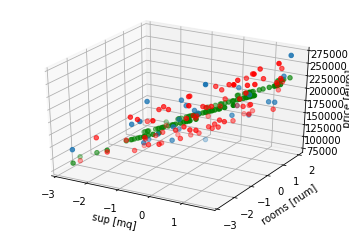

In [23]:
#evaluate the model by using R=1-RSE and MSE
R2_test=linear_reg.score(X_test_ss,y_test)
MSE_test = mean_squared_error( y_test,y_pred_test)
R2_train=linear_reg.score(X_train_ss,y_train)
MSE_train = mean_squared_error(y_train,y_pred_train)
print ('TEST\nR^2=',R2_test,'\nMSE= %f \n' % MSE_test)
print ('TRAIN\nR^2=',R2_train,'\nMSE= %f \n' % MSE_train)

print('Dimensione features vectors',X_test_ss.shape,'\nDimensione output',y_test.shape)

#show the solution
#fig, axs = plt.subplots(1,1)
#axs = Axes3D(fig) 

fig = plt.figure() 
axs = fig.add_subplot(111, projection='3d') 

axs.set_xlabel('sup [mq]')
axs.set_ylabel('rooms [num]')
axs.set_zlabel('price [euro]')
axs.scatter(X_test_ss[:,0],X_test_ss[:,1],y_test)
axs.scatter(X_train_ss[:,0],X_train_ss[:,1],y_train,color='red')
axs.scatter(X_all[:,0],X_all[:,1],y_pred_all,color='green')

#axs.plot(X_all,y_pred_all,c='green',linewidth=3)
fig.show()